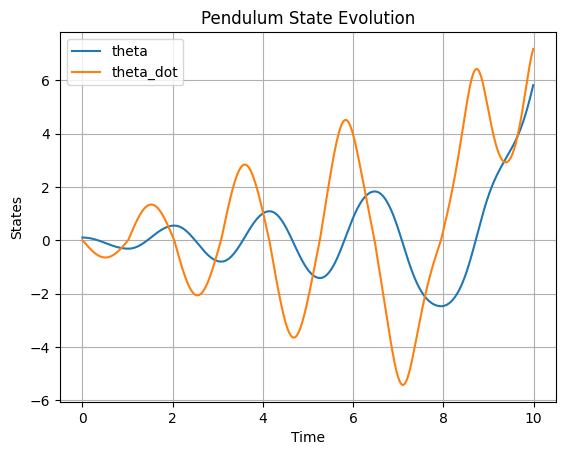

In [13]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System dynamics
def pendulum_dynamics(theta, theta_dot, u):
    m = 1.0  # mass of the pendulum
    l = 1.0  # length of the pendulum
    g = 9.81  # acceleration due to gravity

    theta_double_dot = (u - m * g * l * np.sin(theta)) / (m * l**2)

    return theta_dot, theta_double_dot

# Control Lyapunov function (CLF)
def clf(theta, theta_dot):
    return 0.5 * theta_dot**2 + 9.81 * np.cos(theta)

# CLF time derivative
def clf_derivative(x, u):
    theta_dot = x[1]
    theta_double_dot = pendulum_dynamics(x[0], x[1], u)[1]

    return -theta_dot * theta_double_dot

# Pendulum simulation
def simulate_pendulum(x0, controller, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0

    for i in range(1, len(t)):
        u = controller(x[i-1])
        theta_dot, theta_double_dot = pendulum_dynamics(x[i-1, 0], x[i-1, 1], u)
        x[i] = x[i-1] + dt * np.array([theta_dot, theta_double_dot])

    return t, x

# Optimization-based control
def control_pendulum(x):
    u = cp.Variable()
    clf_dot = clf_derivative(x, u)

    # Optimization problem
    objective = cp.Minimize(clf_dot)
    constraints = [u >= -1, u <= 1]  # Control constraints

    prob = cp.Problem(objective, constraints)
    prob.solve()

    if prob.status == cp.OPTIMAL:
        return u.value
    else:
        return 0.0

# Simulation parameters
x0 = np.array([0.1, 0.0])  # Initial state
dt = 0.01  # Time step
T = 10.0  # Total simulation time

# Simulate and control the pendulum
t, x = simulate_pendulum(x0, control_pendulum, dt, T)

# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='theta')
plt.plot(t, x[:, 1], label='theta_dot')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('Pendulum State Evolution')
plt.grid(True)
plt.show()


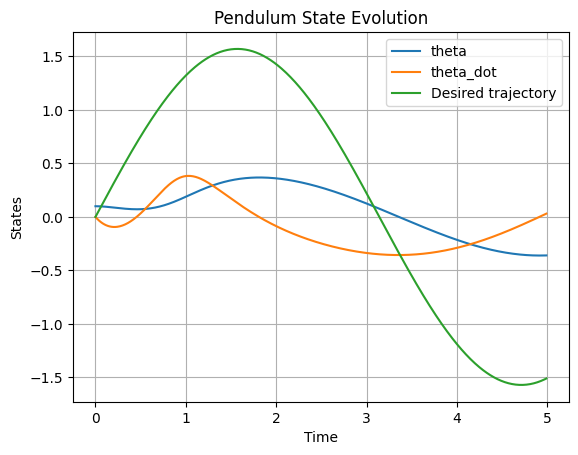

In [14]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System dynamics
def pendulum_dynamics(theta, theta_dot, u):
    m = 1.0  # mass of the pendulum
    l = 1.0  # length of the pendulum
    g = 9.81  # acceleration due to gravity

    theta_double_dot = (u - m * g * l * np.sin(theta)) / (m * l**2)

    return theta_dot, theta_double_dot

# Control Lyapunov function (CLF)
def clf(theta, theta_dot):
    return 0.5 * theta_dot**2 + 9.81 * np.cos(theta)

# Desired trajectory
def desired_trajectory(t):
    return np.pi / 2 * np.sin(t)

# CLF time derivative
def clf_derivative(x, u):
    theta_dot = x[1]
    theta_double_dot = pendulum_dynamics(x[0], x[1], u)[1]

    return -theta_dot * theta_double_dot

# Pendulum simulation
def simulate_pendulum(x0, controller, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0

    for i in range(1, len(t)):
        u = controller(x[i-1], t[i])
        theta_dot, theta_double_dot = pendulum_dynamics(x[i-1, 0], x[i-1, 1], u)
        x[i] = x[i-1] + dt * np.array([theta_dot, theta_double_dot])

    return t, x

# Optimization-based control
def control_pendulum(x, t):
    u = cp.Variable()
    clf_dot = clf_derivative(x, u)

    # Desired trajectory
    theta_desired = desired_trajectory(t)

    # Control law
    u_desired = -clf_dot - 2 * (x[1] - theta_desired)

    # Optimization problem
    objective = cp.Minimize(cp.square(u - u_desired))
    constraints = [u >= -10, u <= 10]  # Control constraints

    prob = cp.Problem(objective, constraints)
    prob.solve()

    if prob.status == cp.OPTIMAL:
        return u.value
    else:
        return 0.0

# Simulation parameters
x0 = np.array([0.1, 0.0])  # Initial state
dt = 0.01  # Time step
T = 5.0  # Total simulation time

# Simulate and control the pendulum
t, x = simulate_pendulum(x0, control_pendulum, dt, T)

# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='theta')
plt.plot(t, x[:, 1], label='theta_dot')
plt.plot(t, desired_trajectory(t), label='Desired trajectory')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('Pendulum State Evolution')
plt.grid(True)
plt.show()


In [47]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System dynamics
def pendulum_dynamics(theta, theta_dot, u):
    m = 1.0  # mass of the pendulum
    l = 1.0  # length of the pendulum
    g = 9.81  # acceleration due to gravity
    theta_double_dot = (u - m * g * l * np.sin(theta)) / (m * l**2)
    return theta_dot, theta_double_dot

# Control Lyapunov function (CLF)
def clf(theta, theta_dot):
    x = np.array([theta, theta_dot])
    return 0.5*(x.T@x)

# Desired trajectories
def desired_trajectory(t):
    theta_desired = np.pi / 2 * np.sin(t)
    theta_dot_desired = np.pi / 2 * np.cos(t)
    theta_double_dot_desired = -(np.pi / 2) * np.sin(t)
    return theta_desired, theta_dot_desired, theta_double_dot_desired

# CLF time derivative
def clf_derivative(x, u):
    theta_dot = x[1]
    theta_double_dot = pendulum_dynamics(x[0], x[1], u)[1]
    
    x_dot = np.array([theta_dot, theta_double_dot])
    return (x.T@x_dot)

# Pendulum simulation
def simulate_pendulum(x0, controller, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0

    for i in range(1, len(t)):
        u = controller(x[i-1], t[i])
        theta_dot, theta_double_dot = pendulum_dynamics(x[i-1, 0], x[i-1, 1], u)
        x[i] = x[i-1] + dt * np.array([theta_dot, theta_double_dot])

    return t, x

# Optimization-based control
def control_pendulum(x, t):
    u = cp.Variable()
    clf_dot = clf_derivative(x, u)
    clf_ = clf(x[0],x[1])
    lam = 10
    # Desired trajectories
    theta_desired, theta_dot_desired, theta_double_dot_desired = desired_trajectory(t)

    # Control laws
    zeta = theta_double_dot_desired
    p = 1

    # Optimization problem
    objective = cp.Minimize((1/2) * cp.square(u-zeta))
    constraints = [clf_dot + lam*clf_<=0,u<=100, u>=-100]  # Control constraints

    prob = cp.Problem(objective, constraints)
    prob.solve()

    if prob.status == cp.OPTIMAL:
        return u.value
    else:
        return 0

# Simulation parameters
x0 = np.array([0.1, 0.0])  # Initial state
dt = 0.01  # Time step
T = 5.0  # Total simulation time

# Simulate and control the pendulum
t, x = simulate_pendulum(x0, control_pendulum, dt, T)

# Desired trajectories
theta_desired, theta_dot_desired, theta_double_dot_desired = desired_trajectory(t)


# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='theta')
plt.plot(t, x[:, 1], label='theta_dot')
plt.plot(t, theta_desired, label='Desired theta')
plt.plot(t, theta_dot_desired, label='Desired theta_dot')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('Pendulum State Evolution')
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'